# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de estimación

## Estimación Lineal por mínimos cuadráticos (LS)

Técnica para ayudar a encontrar modelos lineales en algún parámetro desconocido $\theta$. Recordar que y(1), ... , y(N) son mediciones (variables dependientes). Y existe otra secuencia denominada el vector de regresión $\phi(0), ... ,\phi(N)$, las cuales se reconocen como las entradas del modelo o variables independientes. Un modelo de predicción que incluye errores está dado por la siguiente relación:

$$y(k) = \phi(k)^T\theta + \varepsilon(k)$$

Por tanto si se desea minimizar dicho error

In [2]:
# Comparando la igualdad de x sin perturbación y x con perturbación
x = sym.symbols('x',real = True,positive = True)
fx = 1/x + x
grad_x = fx.diff(x)
hessian = grad_x.diff(x)
x0 = sym.solve(grad_x)

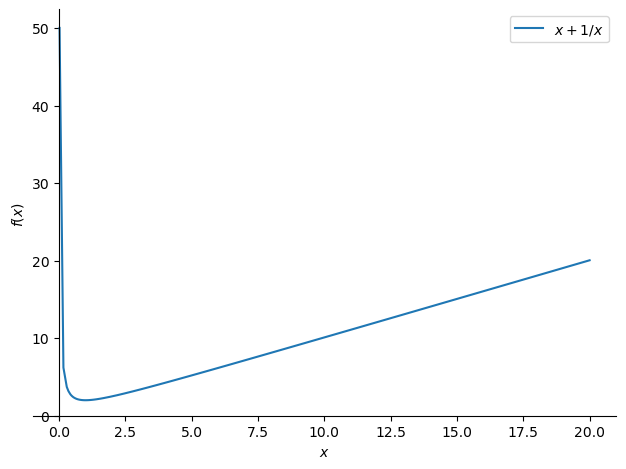

In [21]:
sym.plot(fx,(x,0.02,20),legend=['f(x)'])

In [33]:
p = np.random.randn()/10
x0_p = sym.solve(grad_x+p)
x0_p

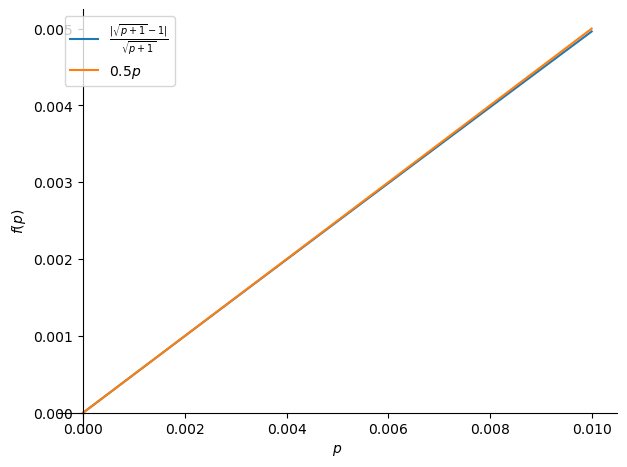

In [26]:
# Comparando la igualdad de x sin perturbación y x con perturbación
p = sym.symbols('p',real = True,positive = True)
f1 = sym.Abs(sym.sqrt(1+p)-1)/sym.sqrt(1+p)
f2 = sym.Abs(p)
C = 0.5
sym.plot(f1,C*f2,(p,0,0.01),legend=['f1','Cp'])